Welcome to the "Hello World" in TensorFlow. In this notebook, you will learn how to write your first simple machine learning model in TensorFlow using the dataset from the package. This idea of this notebook comes from [TensorFlow Tutorial](https://www.tensorflow.org/tutorials/keras/basic_classification). Let's get started!

The dataset used in this notebook is from [MNIST fasion](https://github.com/zalandoresearch/fashion-mnist). This dataset includes 28x28 images for 10 different catagories of cloths and shoes.

In [1]:
# Import needed libraries.
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

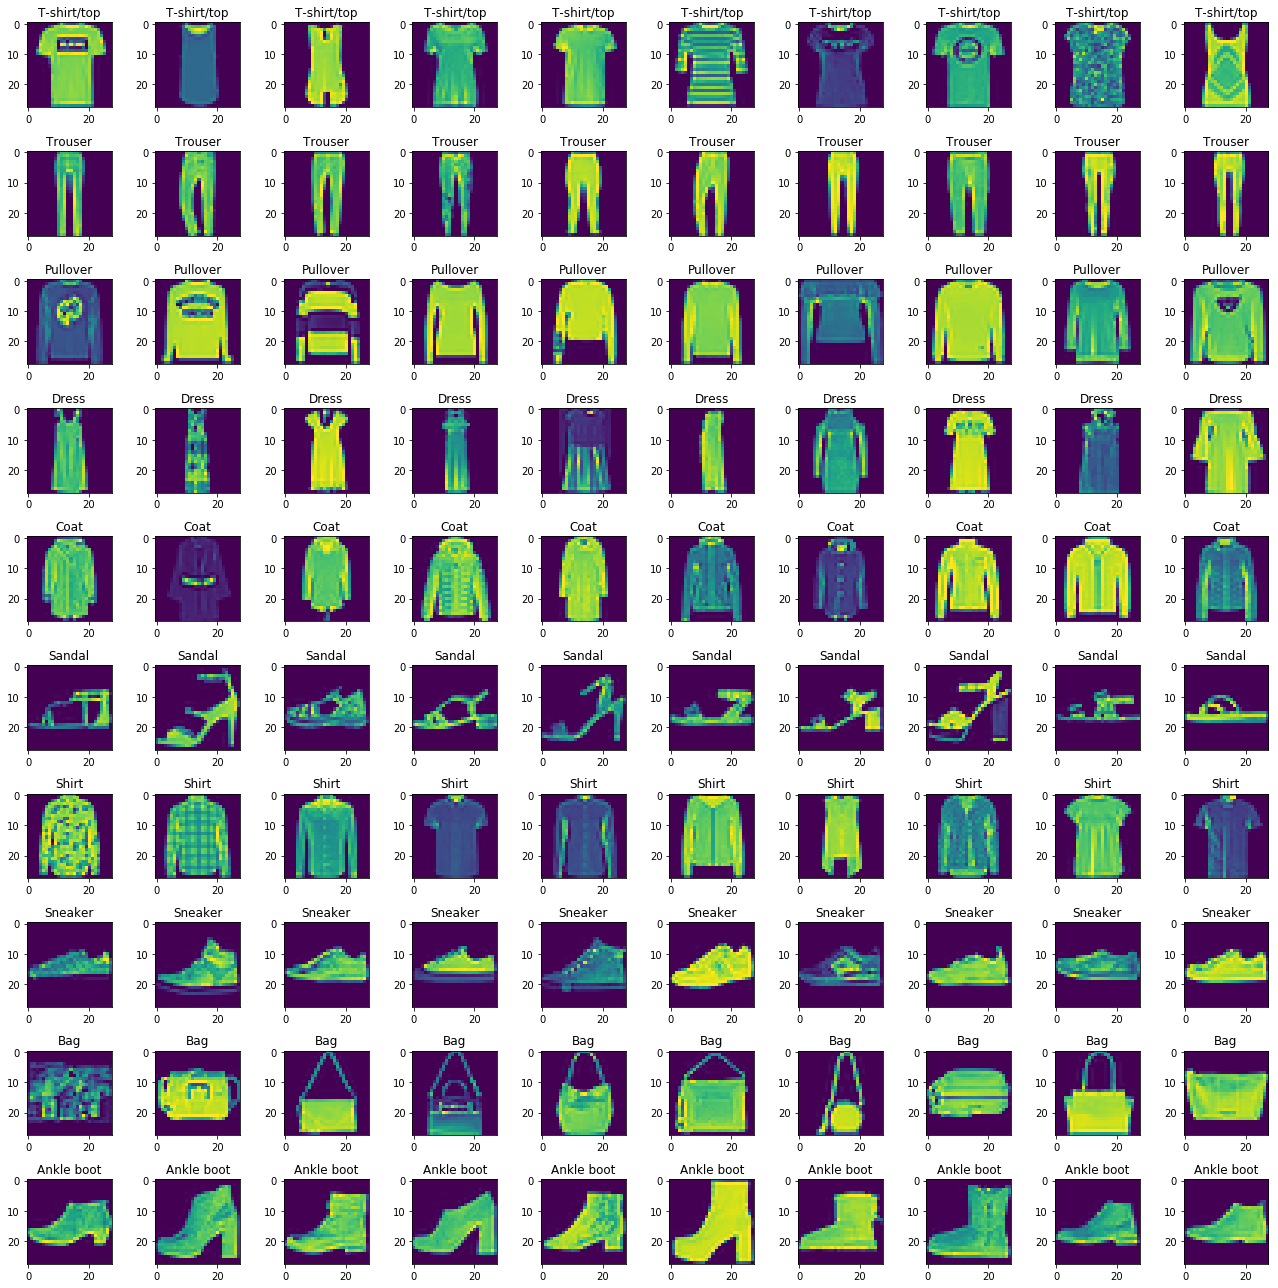

In [2]:
# Download and visualize the dataset.
fashion_images = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_images.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

f, ax = plt.subplots(10,10,figsize=(18,18))
i, count = 0, 1
for k in range(10):
    n = 0
    while n < 10:
        if train_labels[i] == k:
            ax = plt.subplot(10, 10, count)
            ax.set_title(class_names[k])
            ax.imshow(train_images[i])
            count += 1
            n += 1
        i += 1
f.tight_layout()
plt.show()

In [3]:
# Preprocess dataset.
train_images = train_images / 255
test_images = test_images / 255

# Print dataset dimensions.
print('training images: ', train_images.shape)
print('training labels: ', train_labels.shape)
print('training images: ', test_images.shape)
print('training labels: ', test_labels.shape)

training images:  (60000, 28, 28)
training labels:  (60000,)
training images:  (10000, 28, 28)
training labels:  (10000,)


In [5]:
# Model construction.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # transform 2d to 1d array
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [6]:
# Model Compiling.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Model training.
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4997 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3737 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3378 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3149 - acc: 0.8832
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2983 - acc: 0.8892


In [8]:
# Test Evaluation.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3630 - acc: 0.8671
test loss:  0.3630477311849594
test accuracy:  0.8671
